In [58]:
import os 
os.chdir('/Users/alisonlove/Bootcamp/House-Project4')

In [69]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np


In [60]:
# load the cleaned csv 
cleaned_df = pd.read_csv('cleaned_data.csv')

cleaned_df.head()

df = cleaned_df.copy()

In [61]:
# Summary statistics for numerical features
print(df.describe())

# Frequency of categories for a categorical feature like 'County'
print(df['County'].value_counts())


              MLS #  Living Area SqFt  Approximate Lot SqFt  Listing Price  \
count  1.111220e+05     111122.000000         111122.000000  111122.000000   
mean   2.367206e+06       2029.233383          25348.195083  318673.619616   
std    1.723738e+05        661.873082          46648.100160  108182.792924   
min    1.958027e+06        348.000000             87.000000   23156.000000   
25%    2.277082e+06       1517.000000           8276.000000  242000.000000   
50%    2.362848e+06       1960.000000          13068.000000  310000.000000   
75%    2.449061e+06       2455.000000          26571.000000  385000.000000   
max    1.000357e+07       7349.000000         997524.000000  620000.000000   

       Selling Price  Price per SqFt  Price Difference from List  \
count  111122.000000   111122.000000               111122.000000   
mean   320263.260488      162.666819                -1589.640872   
std    108650.251698       46.407141                14656.520713   
min     22500.000000     

/Users/alisonlove/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


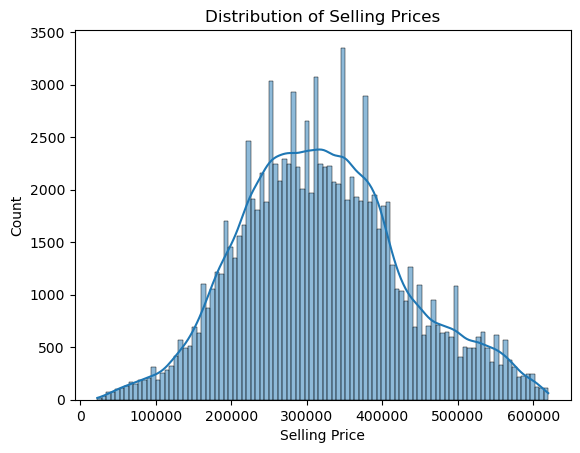

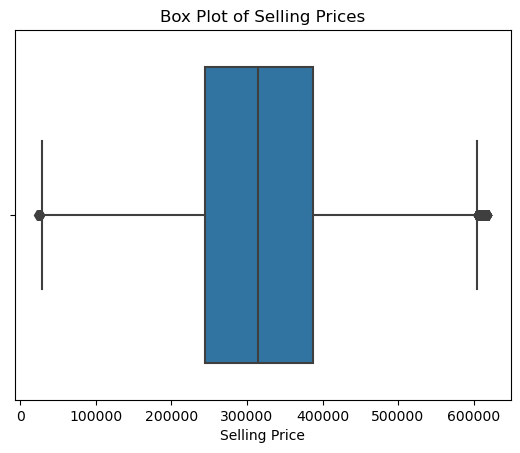

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of the selling price
sns.histplot(df['Selling Price'], kde=True)
plt.title('Distribution of Selling Prices')
plt.show()

# Box plot for selling price to visualize outliers
sns.boxplot(x=df['Selling Price'])
plt.title('Box Plot of Selling Prices')
plt.show()


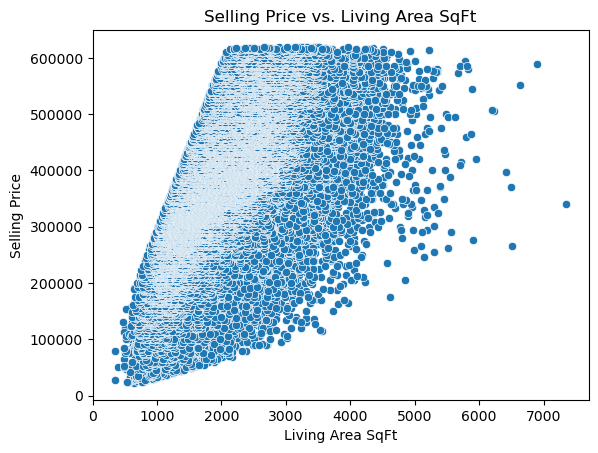

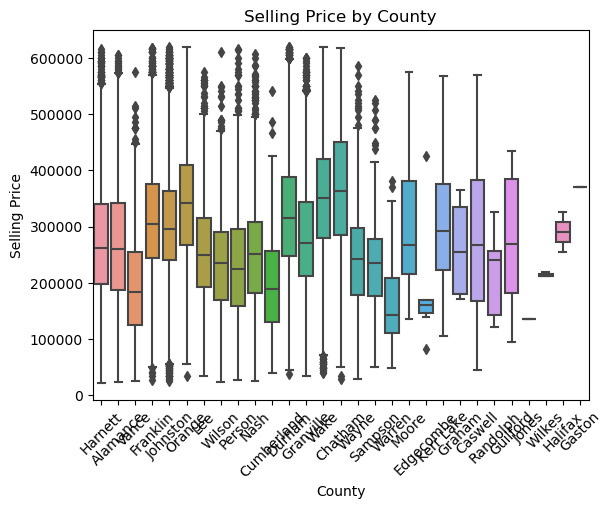

In [63]:
# Scatter plot for a numerical feature like 'Living Area SqFt' against selling price
sns.scatterplot(x='Living Area SqFt', y='Selling Price', data=df)
plt.title('Selling Price vs. Living Area SqFt')
plt.show()

# Box plot for a categorical feature like 'County' against selling price
sns.boxplot(x='County', y='Selling Price', data=df)
plt.title('Selling Price by County')
plt.xticks(rotation=45)
plt.show()


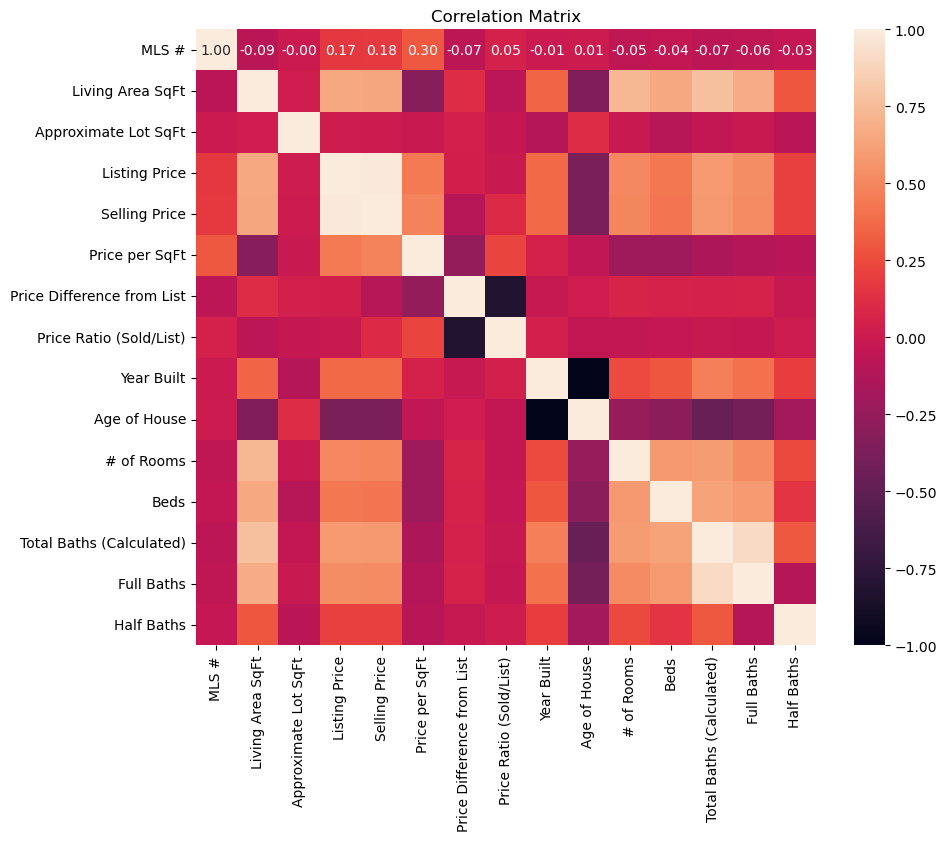

In [70]:
# Select only the numeric columns for the correlation matrix
numeric_df = df.select_dtypes(include=[np.number])

# Calculate the correlation matrix
corr_matrix = numeric_df.corr()

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f")
plt.title('Correlation Matrix')
plt.show()




/Users/alisonlove/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/alisonlove/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/alisonlove/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/alisonlove/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a fu

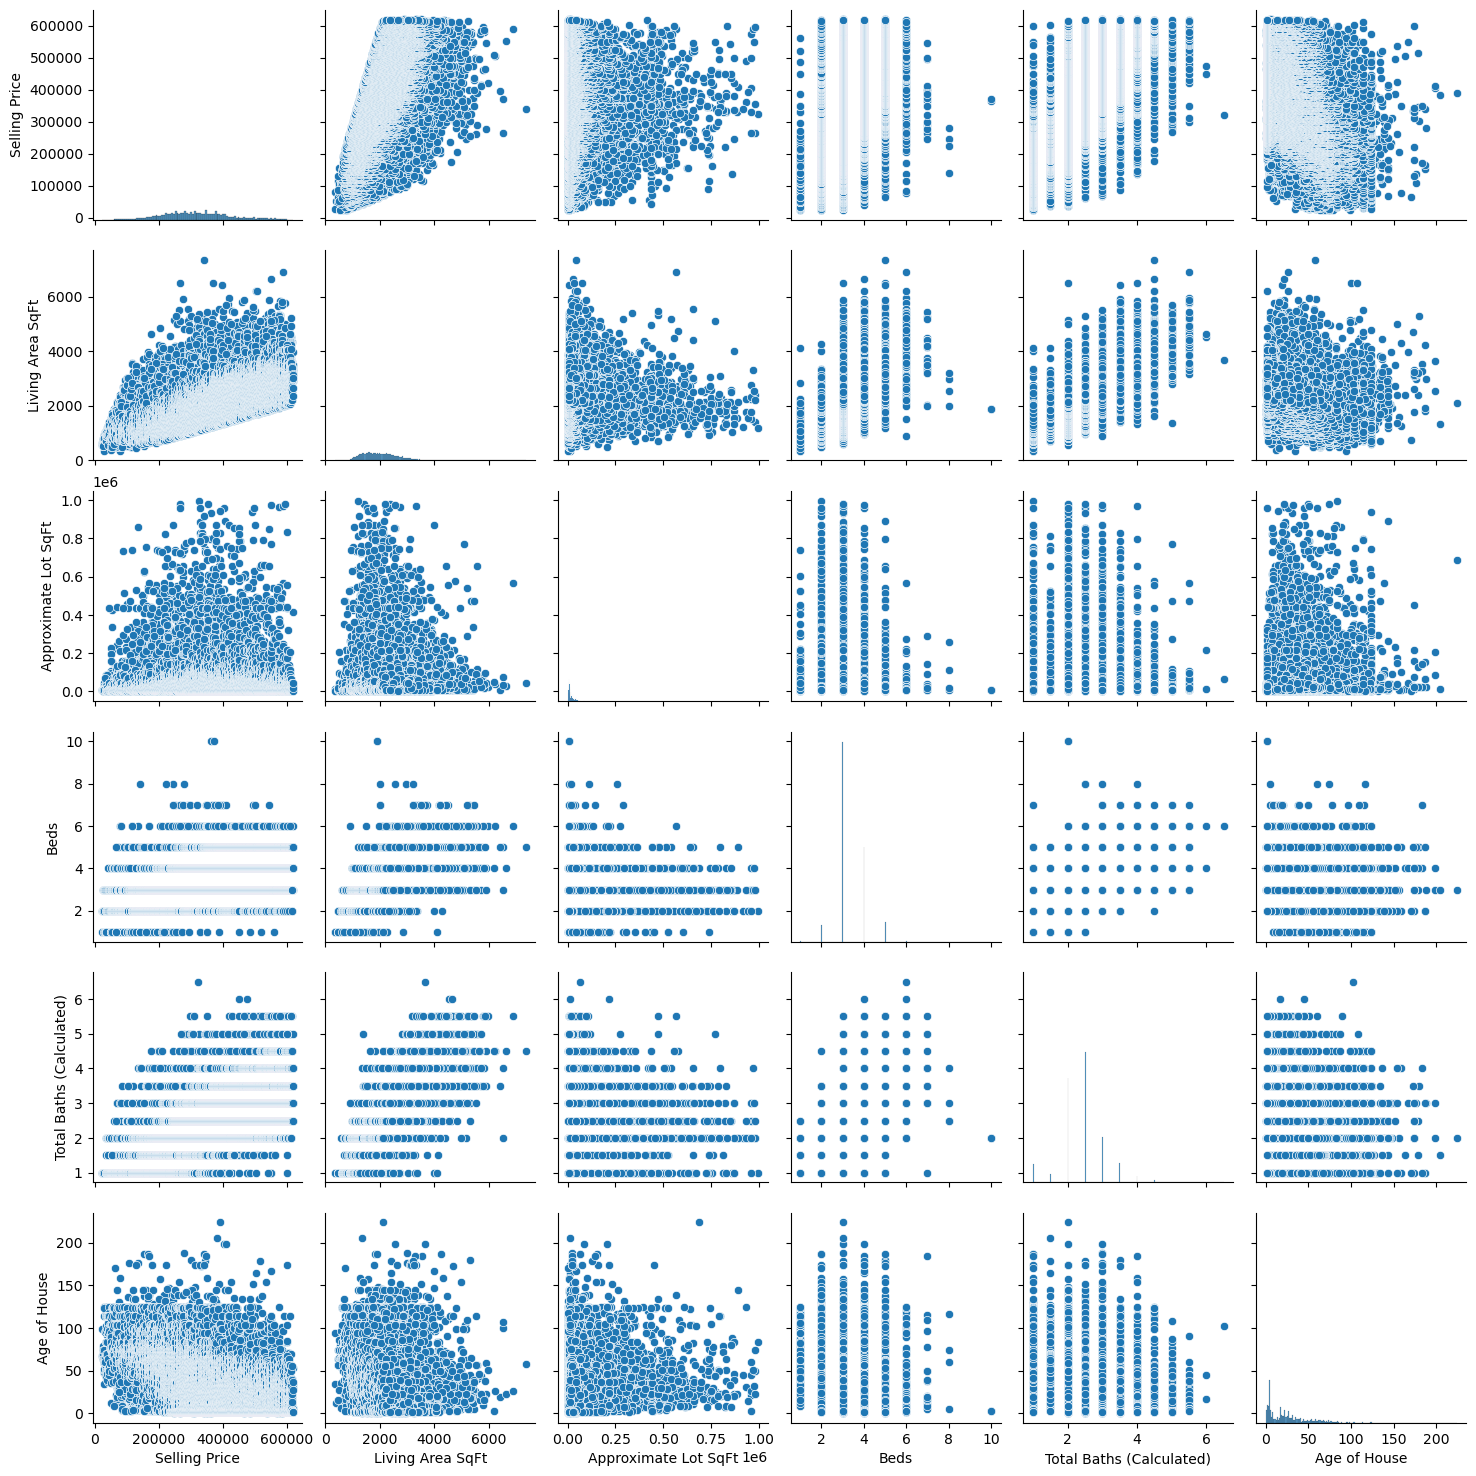

In [67]:
# Pairplot for a subset of features
sns.pairplot(df[['Selling Price', 'Living Area SqFt', 'Approximate Lot SqFt', 'Beds', 'Total Baths (Calculated)', 'Age of House']])
plt.show()


In [ ]:
# Selecting the desired features
selected_features = ['Selling Price', 'County', 'Living Area SqFt', 'Approximate Lot SqFt', 'Beds', 'Total Baths (Calculated)', 'Age of House']

# Creating a new dataframe with selected features
selected_df = cleaned_df[selected_features].copy()

# Displaying the first few rows of the new dataframe
selected_df.head()


,Selling Price,County,Living Area SqFt,Approximate Lot SqFt,Beds,Total Baths (Calculated),Age of House
0,22500,Harnett,645,7405,1,1.0,99
1,23500,Alamance,564,5227,2,1.0,67
2,25500,Vance,744,5227,2,1.0,65
3,28000,Franklin,352,12632,1,1.0,34
4,29000,Vance,850,11761,2,1.0,74


In [ ]:
# Define features (X) and target variable (y)
X = selected_df[['County', 'Living Area SqFt', 'Approximate Lot SqFt', 'Beds', 'Total Baths (Calculated)', 'Age of House']]
y = selected_df['Selling Price']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)


Training set shape: (88897, 6) (88897,)
Testing set shape: (22225, 6) (22225,)


In [ ]:
# Combine the one-hot encoding and normalization steps into a single pipeline
numeric_features = ['Living Area SqFt', 'Approximate Lot SqFt', 'Beds', 'Total Baths (Calculated)', 'Age of House']
numeric_transformer = Pipeline(steps=[('scaler', MinMaxScaler())])

categorical_features = ['County']
categorical_transformer = Pipeline(steps=[('encoder', OneHotEncoder(sparse_output=False))])

preprocessor = ColumnTransformer(transformers=[('num', numeric_transformer, numeric_features),
                                               ('cat', categorical_transformer, categorical_features)])

# Apply transformations
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)



In [ ]:
cleaned_df

,MLS #,Closing Date,Living Area SqFt,Approximate Lot SqFt,Listing Price,Selling Price,Price per SqFt,Price Difference from List,Price Ratio (Sold/List),Year Built,...,# of Rooms,Beds,Total Baths (Calculated),Full Baths,Half Baths,Has Basement,Has Garage,Is Lake/River Waterfront,City,County
0,2220551,2019-02-08,645,7405,47500,22500,34.883721,25000,0.473684,1925,...,4.0,1,1.0,1,0,False,False,False,Dunn,Harnett
1,2231136,2019-02-22,564,5227,27000,23500,41.666667,3500,0.870370,1957,...,4.0,2,1.0,1,0,False,False,False,Burlington,Alamance
2,2214475,2019-01-18,744,5227,29900,25500,34.274194,4400,0.852843,1959,...,5.0,2,1.0,1,0,False,False,False,Henderson,Vance
3,2151695,2019-02-25,352,12632,32500,28000,79.545455,4500,0.861538,1990,...,2.0,1,1.0,1,0,False,False,False,Louisburg,Franklin
4,2234918,2019-02-08,850,11761,29000,29000,34.117647,0,1.000000,1950,...,5.0,2,1.0,1,0,False,False,False,Henderson,Vance
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111117,2537651,2023-10-26,2366,6534,618230,618230,261.297549,0,1.000000,2023,...,9.0,4,3.0,3,0,False,True,False,New Hill,Wake
111118,2517352,2023-09-08,2653,5183,618651,618651,233.189220,0,1.000000,2023,...,8.0,4,3.5,3,1,False,True,False,Apex,Wake
111119,2520499,2023-07-19,3171,26136,618879,618879,195.168401,0,1.000000,2023,...,10.0,5,4.0,4,0,False,True,False,Angier,Johnston
111120,2503170,2023-05-12,3146,16552,615000,619000,196.757788,-4000,1.006504,1997,...,11.0,4,3.5,3,1,False,True,False,Wake Forest,Wake


In [ ]:
# Initialize the Linear Regression model
lr_model = LinearRegression()

# Train the model
lr_model.fit(X_train_preprocessed, y_train)

# Predict on the testing set
y_pred = lr_model.predict(X_test_preprocessed)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 5594640350.76452
R-squared: 0.5247957754513981
